# Naive-Bayes

In [1]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import nltk
import gensim

In [3]:

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [5]:
import nltk
import pandas as pd

In [6]:
# Other imports
from collections import Counter
from scipy.misc import imread
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [7]:
# IMPORTING ALL THE NECESSARY LIBRARIES AND PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve, GridSearchCV
%matplotlib inline

In [8]:
# LOADING THE DATASET AND SEEING THE DETAILS
data = pd.read_csv('train_self_drive_clean.csv', index_col= None)
data = data.drop('Unnamed: 0', axis=1)
data.head()

,sentiment,text,cleaned
0,5,@manjulamartin @Kirk_Gleason Except trains are...,manjulamartin kirk gleason except train capita...
1,5,I want a Google driverless car.,want google driverless car
2,5,@Oatmeal @google driverless @TeslaMotors ? Ooo...,oatmeal google driverless teslamotors ooooh wo...
3,5,SO MUCH AWESOME! Amazing video for GoogleÌ¢‰âÂ...,much awesome amazing video google next phase d...
4,5,@google is making driverless cars which is awe...,google making driverless car awesome http co h...


In [9]:
data.columns

Index(['sentiment', 'text', 'cleaned'], dtype='object')

In [10]:
# SHAPE OF THE DATASET
print("Shape of the dataset:")
print(data.shape)

Shape of the dataset:
(981, 3)


In [11]:
data_test = pd.read_csv('test.csv')

In [12]:
data_test.shape

(979, 2)

In [13]:
data_test.head()

,id,text
0,1,Two places I'd invest all my money if I could:...
1,2,Awesome! Google driverless cars will help the ...
2,3,Autonomous vehicles could reduce traffic fatal...
3,4,Really good presentation from Jan Becker on Bo...
4,5,Ford just revealed it's Automated Ford Fusion ...


In [14]:
# DATATYPE OF EACH COLUMN
print("Datatype of each column:")
print(data.dtypes)

Datatype of each column:
sentiment     int64
text         object
cleaned      object
dtype: object


In [15]:
# DATASET SUMMARY
data.describe(include='all')

,sentiment,text,cleaned
count,981.000000,981,981
unique,NaN,981,978
top,NaN,Q: Why are driverless cars all Prius? A: Drivi...,driverless car
freq,NaN,1,2
mean,3.136595,NaN,NaN
std,0.786166,NaN,NaN
min,1.000000,NaN,NaN
25%,3.000000,NaN,NaN
50%,3.000000,NaN,NaN
75%,3.000000,NaN,NaN


In [16]:
data['sentiment'].value_counts()

3    603
4    179
2    117
5     59
1     23
Name: sentiment, dtype: int64

In [17]:
# Saving dependant variable for future modeling
y=data['sentiment']

In [18]:
#CREATING A NEW COLUMN IN THE DATASET FOR THE NUMBER OF WORDS IN THE REVIEW
data['length'] = data['text'].apply(len)
data.head()

,sentiment,text,cleaned,length
0,5,@manjulamartin @Kirk_Gleason Except trains are...,manjulamartin kirk gleason except train capita...,140
1,5,I want a Google driverless car.,want google driverless car,31
2,5,@Oatmeal @google driverless @TeslaMotors ? Ooo...,oatmeal google driverless teslamotors ooooh wo...,72
3,5,SO MUCH AWESOME! Amazing video for GoogleÌ¢‰âÂ...,much awesome amazing video google next phase d...,116
4,5,@google is making driverless cars which is awe...,google making driverless car awesome http co h...,73


## Visualization

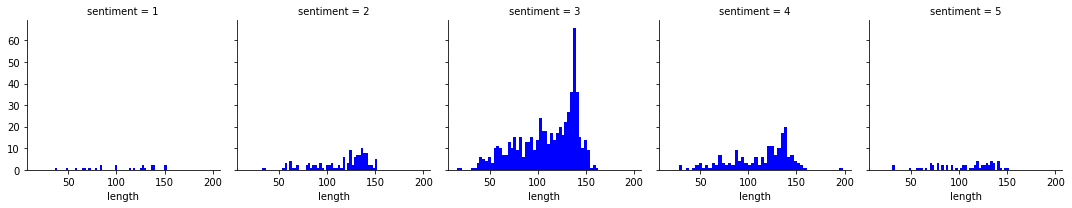

In [19]:
# COMPARING TEXT LENGTH TO Sentiments
graph = sns.FacetGrid(data=data,col='sentiment')
graph.map(plt.hist,'length',bins=50,color='blue')

## Classifying the dataset and splitting it into the reviews and given sentiments

In [20]:
# CLASSIFICATION
#data_classes = data[(data['sentiment']==1) | (data['sentiment']==3) | (data['sentiment']==5)]
#data_classes.head()

In [21]:
#data_classes.shape

**We have got a smaller dataset. Better way is to do sentiment analysis. See what are positive , negative and neutral emotions and then rank them accordingly**

In [22]:
# for vectorize and lemmatization
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

## Tf-idf

In [23]:
text=data['cleaned']

In [24]:
text[0:5]

0    manjulamartin kirk gleason except train capita...
1                           want google driverless car
2    oatmeal google driverless teslamotors ooooh wo...
3    much awesome amazing video google next phase d...
4    google making driverless car awesome http co h...
Name: cleaned, dtype: object

In [25]:
#tf_vectorizer = LemmaCountVectorizer(max_df=0.95, 
                                     #min_df=2,
                                     #stop_words='english',
                                     #decode_error='ignore')
#tf = tf_vectorizer.fit_transform(text)

In [26]:
"""
feature_names = tf_vectorizer.get_feature_names()
count_vec = np.asarray(tf.sum(axis=0)).ravel()
zipped = list(zip(feature_names, count_vec))
x, y = (list(x) for x in zip(*sorted(zipped, key=lambda x: x[1], reverse=True)))
# Now I want to extract out on the top 15 and bottom 15 words
Y = np.concatenate([y[0:15], y[-16:-1]])
X = np.concatenate([x[0:15], x[-16:-1]])

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[0:50],
            y = y[0:50],
            marker= dict(colorscale='Jet',
                         color = y[0:50]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[-100:],
            y = y[-100:],
            marker= dict(colorscale='Portland',
                         color = y[-100:]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Bottom 100 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

"""

"\nfeature_names = tf_vectorizer.get_feature_names()\ncount_vec = np.asarray(tf.sum(axis=0)).ravel()\nzipped = list(zip(feature_names, count_vec))\nx, y = (list(x) for x in zip(*sorted(zipped, key=lambda x: x[1], reverse=True)))\n# Now I want to extract out on the top 15 and bottom 15 words\nY = np.concatenate([y[0:15], y[-16:-1]])\nX = np.concatenate([x[0:15], x[-16:-1]])\n\n# Plotting the Plot.ly plot for the Top 50 word frequencies\ndata = [go.Bar(\n            x = x[0:50],\n            y = y[0:50],\n            marker= dict(colorscale='Jet',\n                         color = y[0:50]\n                        ),\n            text='Word counts'\n    )]\n\nlayout = go.Layout(\n    title='Top 50 Word frequencies after Preprocessing'\n)\n\nfig = go.Figure(data=data, layout=layout)\n\npy.iplot(fig, filename='basic-bar')\n\n# Plotting the Plot.ly plot for the Top 50 word frequencies\ndata = [go.Bar(\n            x = x[-100:],\n            y = y[-100:],\n            marker= dict(colorscale=

In [27]:
"""
#Shape of the matrix:
print("Shape of the sparse matrix: ", tf.shape)
#Non-zero occurences:
print("Non-Zero occurences: ",tf.nnz)

"""

'\n#Shape of the matrix:\nprint("Shape of the sparse matrix: ", tf.shape)\n#Non-zero occurences:\nprint("Non-Zero occurences: ",tf.nnz)\n\n'

In [28]:
"""
# DENSITY OF THE MATRIX
density = (tf.nnz/(tf.shape[0]*tf.shape[1]))*100
print("Density of the matrix = ",density)
"""

'\n# DENSITY OF THE MATRIX\ndensity = (tf.nnz/(tf.shape[0]*tf.shape[1]))*100\nprint("Density of the matrix = ",density)\n'

# Creating key features for modeling

In [29]:
data = pd.read_csv('train_self_drive_clean.csv', index_col= None)
data = data.drop('Unnamed: 0', axis=1)
data.head()

,sentiment,text,cleaned
0,5,@manjulamartin @Kirk_Gleason Except trains are...,manjulamartin kirk gleason except train capita...
1,5,I want a Google driverless car.,want google driverless car
2,5,@Oatmeal @google driverless @TeslaMotors ? Ooo...,oatmeal google driverless teslamotors ooooh wo...
3,5,SO MUCH AWESOME! Amazing video for GoogleÌ¢‰âÂ...,much awesome amazing video google next phase d...
4,5,@google is making driverless cars which is awe...,google making driverless car awesome http co h...


In [30]:
data.shape

(981, 3)

In [31]:
data_test = pd.read_csv('test.csv')
data_test.head()

,id,text
0,1,Two places I'd invest all my money if I could:...
1,2,Awesome! Google driverless cars will help the ...
2,3,Autonomous vehicles could reduce traffic fatal...
3,4,Really good presentation from Jan Becker on Bo...
4,5,Ford just revealed it's Automated Ford Fusion ...


In [32]:
data_test.shape

(979, 2)

### working with features

In [33]:
train=data['cleaned']

In [34]:
test=data_test['text']

# Vectorize

In [35]:
# instantiate the vectorizer
vect = CountVectorizer()
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(train)
train_dtm = vect.transform(train)

In [36]:
type(train_dtm)

scipy.sparse.csr.csr_matrix

In [37]:
train_dtm

<981x3758 sparse matrix of type '<class 'numpy.int64'>'
	with 11403 stored elements in Compressed Sparse Row format>

In [38]:
target=data['sentiment']
target[:3]

0    5
1    5
2    5
Name: sentiment, dtype: int64

In [44]:
target.shape

(981,)

In [39]:
test=data_test['text']

In [40]:
test.shape

(979,)

In [41]:
# for our test set
test_dtm = vect.transform(test)
test_dtm

<979x3758 sparse matrix of type '<class 'numpy.int64'>'
	with 7297 stored elements in Compressed Sparse Row format>

**Summary:**

- `vect.fit(train)` **learns the vocabulary** of the training data
- `vect.transform(train)` uses the **fitted vocabulary** to build a document-term matrix from the training data
- `vect.transform(test)` uses the **fitted vocabulary** to build a document-term matrix from the testing data (and **ignores tokens** it hasn't seen before)

# Modeling

In [42]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(train_dtm,target)
predmnb = mnb.predict(test_dtm)

In [45]:
acc_log = round(mnb.score(train_dtm, target) * 100, 2)
acc_log

84.71